# Machine Learning in R

In this notebook, you will build a simple machine learning model to predict house prices based on its location. You will be introduced to the `tidymodels` framework to do machine learning in R.

In [1]:
suppressPackageStartupMessages(library(tidyverse, warn.conflicts = FALSE))
suppressPackageStartupMessages(library(tidymodels, warn.conflicts = FALSE))

## 0. Get the data

The first step is to get the data and explore it. We will use the `ames` dataset that ships with the `tidymodels` package. The documentation of the dataset states:

> A data set from De Cock (2011) has 82 fields were recorded for 2,930 properties in Ames IA. This version is copies from the AmesHousing package but does not include a few quality columns that appear to be outcomes rather than predictors.

In [2]:
data(ames)
ames_data = ames %>%
  janitor::clean_names()
head(ames_data)

ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,⋯,fence,misc_feature,misc_val,mo_sold,year_sold,sale_type,sale_condition,sale_price,longitude,latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


Our objective is to build a model that predicts `sale_price`. While this dataset is rich in potential __features__ we can use, we will build the simplest possible model. only including the `latitude` and `longitude` as features, in order to keep the emphasis on the process expounded by `tidymodels`.

## 1. Split the data into training and test sets

Let us start by splitting the data into training and test sets. The basic idea is to train the model on a portion of the data and test its performance on the other portion that has not been seen by the model. This is done in order to prevent __overfitting__.

In [3]:
set.seed(1234)
ames_splits <- initial_split(ames_data)
ames_train <- training(ames_splits)
ames_test <- testing(ames_splits)
ames_splits

<Training/Testing/Total>
<2197/733/2930>

## 2. Choose a class of model, and hyperparameters.

The next step is to choose a class of models and specify hyperparameters. This is just for starters and we will see later how we can specify a range of values for hyperparameters and tune the model for optimal performance! We will pick the simple, yet very effective K Nearest Neighbours model!

In [4]:
ames_knn_mod <- nearest_neighbor() %>%
  set_mode('regression') %>%
  set_engine('kknn') %>%
  update(neighbors = 5)

ames_knn_mod

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = 5

Computational engine: kknn 


## 3. Fit the model to the training data

It is time to fit the model on the training data. We will fit the simplest possible model that uses the location coordinates of the house as predictors of sale price. We use the logarithm of the sale price as the response variable, since it is highly skewed.

In [5]:
ames_knn_fit <- ames_knn_mod %>%
  fit(log10(sale_price) ~ latitude + longitude, data = ames_train)

ames_knn_fit

parsnip model object


Call:
kknn::train.kknn(formula = log10(sale_price) ~ latitude + longitude,     data = data, ks = min_rows(5, data, 5))

Type of response variable: continuous
minimal mean absolute error: 0.06967213
Minimal mean squared error: 0.01011437
Best kernel: optimal
Best k: 5

## 4. Use the fitted model to predict on test data

Now that we have fitted the model using training data, we can use the fitted model to predict prices for houses in the test dataset. We do this using the `predict` method.

In [6]:
ames_knn_pred <- ames_knn_fit %>%
  predict(new_data = ames_test)

ames_knn_pred

.pred
<dbl>
5.113332
5.142727
5.237998
5.220534
5.621736
5.075795
5.140979
5.450747
5.451848


## 5. Evaluate performance

Finally, let us evaluate the performance of the model. A good performance measure to use here is the RMSE (Root Mean Squared Error). Additionally, we will also plot the actual prices vs. the predicted prices to get a sense of how close they are.


`geom_smooth()` using formula = 'y ~ x'


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.0938271


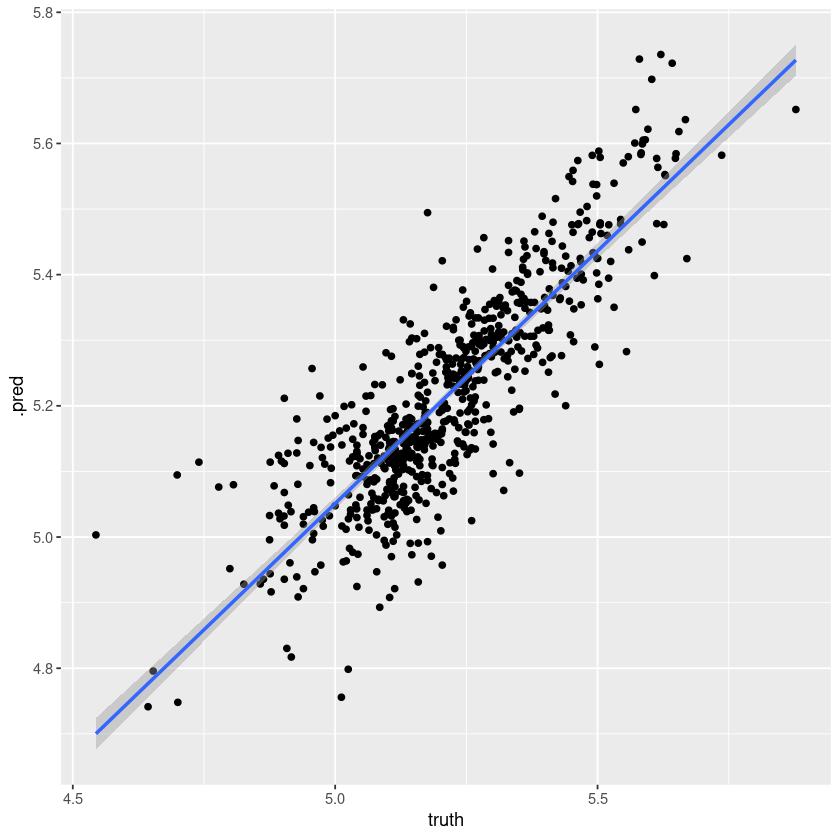

In [7]:
ames_test_pred <- ames_knn_pred %>%
  bind_cols(ames_test) %>%
  mutate(truth = log10(sale_price))

ames_test_pred %>%
  ggplot(aes(x = truth, y = .pred)) +
  geom_point() +
  geom_smooth(method = 'lm')

ames_knn_metrics <- ames_test_pred %>%
  rmse(truth = truth, estimate = .pred)

ames_knn_metrics